In [1]:
import pandas as pd
import numpy as np
from apiclient.discovery import build
from apiclient.errors import HttpError

### Authentification YouTube API

In [2]:
DEVELOPER_KEY = ""
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION,
    developerKey=DEVELOPER_KEY)

### Les Vidéos 

In [3]:
#Récuperation des vidéos
list_videos = youtube.search().list(q="2016 GOP Presidential Debate",type="video",order = "relevance",maxResults=5,
                               part="id,snippet").execute().get('items')

In [4]:
list_videos

[{'kind': 'youtube#searchResult',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1D2-dAeRTJD58WTrxMkekFg9_Kk"',
  'id': {'kind': 'youtube#video', 'videoId': 'Un3OhYs-tCE'},
  'snippet': {'publishedAt': '2016-02-15T20:41:25.000Z',
   'channelId': 'UC2tg0g4H9h9bDfvuyBGxeRA',
   'title': 'Full CBS News South Carolina Republican Debate',
   'description': 'Full CBS News South Carolina Republican Debate.',
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/Un3OhYs-tCE/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/Un3OhYs-tCE/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url': 'https://i.ytimg.com/vi/Un3OhYs-tCE/hqdefault.jpg',
     'width': 480,
     'height': 360}},
   'channelTitle': 'CBSN',
   'liveBroadcastContent': 'none'}},
 {'kind': 'youtube#searchResult',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/vmMoZduHJo3qrwYFDNCoaBb15hs"',
  'id': {'kind': 'youtube#video', 'videoId': '2rU4W3yfd58'},
  'snippet': {'publ

In [5]:
data={
    'title':[],
    'channelTitle':[],
    'description':[],
    'videoId':[],
    'publishedAt':[]
}

l = len(list_videos)

for i,item in enumerate(list_videos):
    data['title'].append(item['snippet']['title'])
    data['channelTitle'].append(item['snippet']['channelTitle'])
    data['description'].append(item['snippet']['description'])
    data['videoId'].append(item['id']['videoId'])
    data['publishedAt'].append(item['snippet']['publishedAt'])
    


In [6]:
df_videos = pd.DataFrame(data)

In [7]:
df_videos.head()

,title,channelTitle,description,videoId,publishedAt
0,Full CBS News South Carolina Republican Debate,CBSN,Full CBS News South Carolina Republican Debate.,Un3OhYs-tCE,2016-02-15T20:41:25.000Z
1,First Republican Primary Debate - Main Stage -...,2016 US Presidential Debates,"Republican (Main Stage) Debate #1 August 6, 20...",2rU4W3yfd58,2016-04-16T04:54:03.000Z
2,Part 1 of the Fox News GOP presidential debate...,Fox News,Candidates clash over conservative principles ...,GzPIbX1pzDg,2016-03-04T03:21:08.000Z
3,FINAL REPUBLICAN PRESIDENTIAL DEBATE OF 2015 (...,wwwMOXNEWScom,"December 15, 2015 CNN News http://MOXNews.com.",dU83OPXP6_g,2015-12-16T07:48:32.000Z
4,Second 2016 GOP Presidential Debate FULL by CN...,2016 presidentinal debate,Second 2016 GOP Presidential Debate FULL by CN...,G20tjQGJ9go,2015-12-06T12:23:53.000Z


In [8]:
df_videos.to_csv('videos_gop.csv')

### Commentaires On Gop

In [9]:
comments_data={
    'id':[],
    'likeCount':[],
    'textDisplay':[],
    'videoId':[],
    'authorDisplayName':[],
    'authorChannelId':[],
    'publishedAt':[]
}
l = len(list_videos)



for i,item in enumerate(list_videos):
    
        threads = youtube.commentThreads().list( 
            videoId=item['id']['videoId'] ,  
            part='snippet,replies',
            maxResults=100
        ).execute().get('items')
        for thread in threads:
            comments_data['id'].append(thread['id'])
            comments_data['likeCount'].append(thread['snippet']['topLevelComment']['snippet']['likeCount'])
            comments_data['textDisplay'].append(thread['snippet']['topLevelComment']['snippet']['textDisplay'])
            comments_data['videoId'].append(thread['snippet']['videoId'])
            comments_data['publishedAt'].append(thread['snippet']['topLevelComment']['snippet']['publishedAt'])
            comments_data['authorChannelId'].append(thread['snippet']['topLevelComment']['snippet']['authorChannelId']['value'])
            comments_data['authorDisplayName'].append(thread['snippet']['topLevelComment']['snippet']['authorDisplayName'])
        

   



In [10]:
df_comments = pd.DataFrame(data=comments_data)

In [11]:
df_comments.head()

,id,likeCount,textDisplay,videoId,authorDisplayName,authorChannelId,publishedAt
0,Ugzi-DlufUPIiDtBHt94AaABAg,0,I had to stop at the 9 minute 34 second mark. ...,Un3OhYs-tCE,David Kwon,UCK5UbViW9PwIHKt9U1O7T9Q,2018-11-25T05:49:59.000Z
1,UgzRoSnDLwTMeF8AyW94AaABAg,0,I Love USA,Un3OhYs-tCE,Deepak Bhandari,UCzgvfZsK0Q6N-2l3R4oZcOQ,2018-11-22T14:59:24.000Z
2,UgzFHKKCTauXV-3zQ3p4AaABAg,0,Marco Rubio really sucks,Un3OhYs-tCE,Peter Tan,UCFfJDbKsq7K_HadOj5jY_dg,2018-11-20T03:29:59.000Z
3,UgyRUw0wxExpeYivxlV4AaABAg,0,I watch this high ALL of the time. Wonderful!...,Un3OhYs-tCE,T.J. Kolberg,UCNlUO8cyG6x1nmNrwVpc1hg,2018-11-15T18:39:53.000Z
4,UgwvJma1HMTraTODmJF4AaABAg,1,"Ted Cruz is slicker than grease, yuall<br /><b...",Un3OhYs-tCE,collj86,UCO3s_ZEbeDv9sn87FAfglVQ,2018-11-15T16:38:32.000Z


In [12]:
df_comments.to_csv('comments.csv')

## Modèle d'Analyse Sentimentale

In [13]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('./Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [15]:
data.head(10)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


No neutral comments

In [16]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [17]:
# Récuperation des text et séparation par polarité
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [18]:
# fonction pour afficher un nuage de mots
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


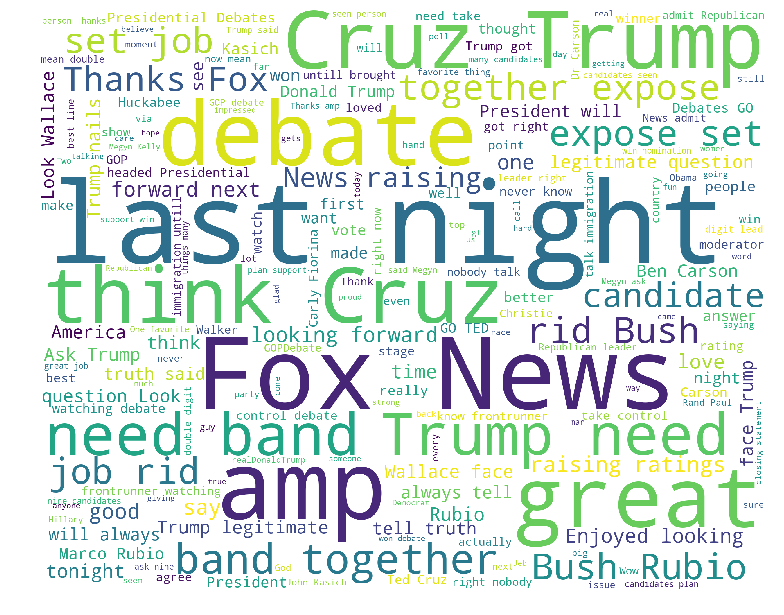

In [19]:
print("Positive words")
wordcloud_draw(train_pos,'white')

Interesting to notice the following words and expressions in the positive word set: truth, strong, legitimate, together, love, job.

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.

Negative words


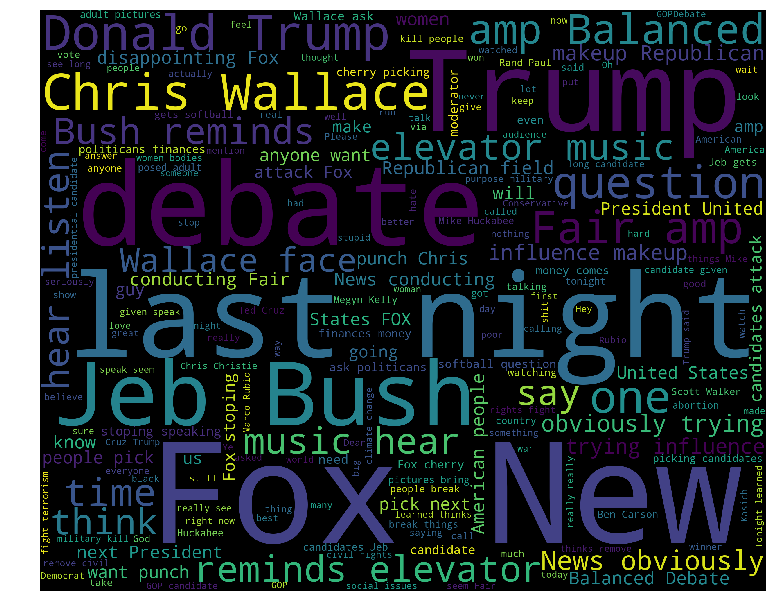

In [20]:
print("Negative words")
wordcloud_draw(train_neg)

At the same time, negative tweets contains words like: influence, news, elevator music, disappointing, softball, makeup, cherry picking, trying

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

Nettoyage des tweets

In [21]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

Extraction des features à partir du texte en se basant sur la fréquence

In [22]:
# Tokenize des mots
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
#Features
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

#Features ==> Dictionnaire
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Les features les plus apparentes

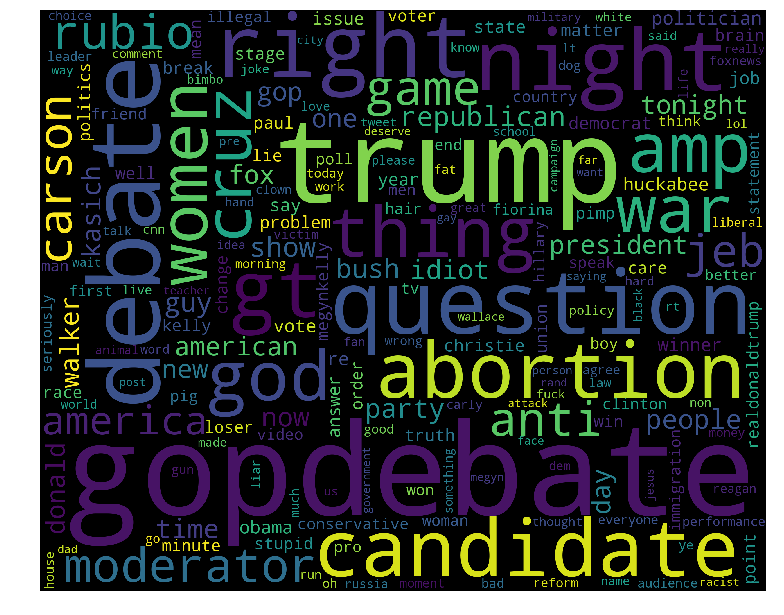

In [23]:
wordcloud_draw(w_features)

Training the Naive Bayes classifier

In [24]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Résultat du training

In [25]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 836/798 
[Positive]: 240/88 


## Analyse sentimentale sur YouTube Comments

Test sur les commentaires

In [26]:
# Tokenize des mots
def get_words_in_youtube(yt_comments):
    all = []
    for comment in yt_comments:
        all.extend(comment.split())
    return all

#Features
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features



In [27]:
y_features = get_word_features(get_words_in_youtube(list(df_comments.textDisplay)))

In [28]:
#Features ==> Dictionnaire
def extract_features_yt(document):
    document_words = set(document)
    features = {}
    for word in y_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Wordcloud Youtube

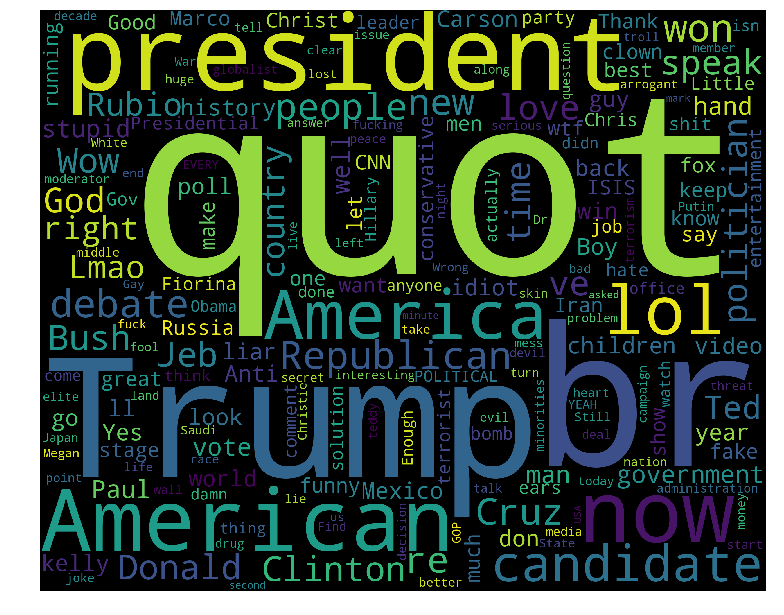

In [29]:
wordcloud_draw(y_features)

In [30]:
neg_cnt = 0
pos_cnt = 0
pol = []
for obj in df_comments.textDisplay:
    res =  classifier.classify(extract_features_yt(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
    pol.append(res)
        
print('[Negative]: %s '  % neg_cnt)       
print('[Positive]: %s '  % pos_cnt) 

[Negative]: 422 
[Positive]: 78 


In [31]:
yt_com_pol = pd.DataFrame(dict(polarity = pol,comments = list(df_comments.textDisplay.values)))

In [32]:
yt_com_pol.polarity.value_counts()

Negative    422
Positive     78
Name: polarity, dtype: int64

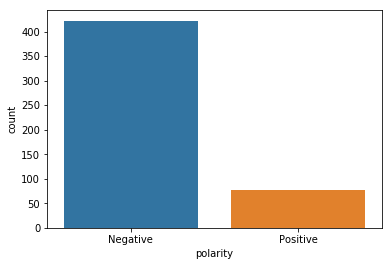

In [33]:
import seaborn as sns
sns.countplot(yt_com_pol['polarity']);

### Graph

In [34]:
df_comments.head()

,id,likeCount,textDisplay,videoId,authorDisplayName,authorChannelId,publishedAt
0,Ugzi-DlufUPIiDtBHt94AaABAg,0,I had to stop at the 9 minute 34 second mark. ...,Un3OhYs-tCE,David Kwon,UCK5UbViW9PwIHKt9U1O7T9Q,2018-11-25T05:49:59.000Z
1,UgzRoSnDLwTMeF8AyW94AaABAg,0,I Love USA,Un3OhYs-tCE,Deepak Bhandari,UCzgvfZsK0Q6N-2l3R4oZcOQ,2018-11-22T14:59:24.000Z
2,UgzFHKKCTauXV-3zQ3p4AaABAg,0,Marco Rubio really sucks,Un3OhYs-tCE,Peter Tan,UCFfJDbKsq7K_HadOj5jY_dg,2018-11-20T03:29:59.000Z
3,UgyRUw0wxExpeYivxlV4AaABAg,0,I watch this high ALL of the time. Wonderful!...,Un3OhYs-tCE,T.J. Kolberg,UCNlUO8cyG6x1nmNrwVpc1hg,2018-11-15T18:39:53.000Z
4,UgwvJma1HMTraTODmJF4AaABAg,1,"Ted Cruz is slicker than grease, yuall<br /><b...",Un3OhYs-tCE,collj86,UCO3s_ZEbeDv9sn87FAfglVQ,2018-11-15T16:38:32.000Z


In [35]:
df_comments.shape

(500, 7)

In [36]:
tweets[0][0]

['jeb',
 'stands',
 '"act',
 'love";',
 'comments',
 'earned',
 'legal',
 'status',
 '[boo]']

In [37]:
data.shape

(13871, 2)

In [38]:
#Create new ID for tweeets
data.insert(2,'New_ID', range(0,len(data)))
data.head()

,text,sentiment,New_ID
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral,0
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive,1
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral,2
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive,3
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive,4


In [39]:
#Nettoyage d'un text
import re
def clean_text(text):
    '''
    Utility function to clean the text in a comment or tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

In [41]:
#liste des commentaires youtube nettoyés
cleaned_yt = []
for com in df_comments['textDisplay']:
    
    cleaned_yt.append(clean_text(com))
cleaned_yt[1:5]

['I Love USA',
 'Marco Rubio really sucks',
 'I watch this high ALL of the time Wonderful I think somewhere around the 3hr14min mark is when the first thing was said',
 'Ted Cruz is slicker than grease yuall br br Trump 2016 for president br br Thumbs up if u agree']

In [42]:
# Splitting et suppression des stopwords
yt_words = []
stopwords_set = set(stopwords.words("english"))

for phrase in cleaned_yt:
    words_filtered = [e.lower() for e in phrase.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('<')
        and not word.startswith('#')
        and word != 'http']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    yt_words.append(words_without_stopwords)
yt_words[1:5]

[['love', 'usa'],
 ['marco', 'rubio', 'really', 'sucks'],
 ['watch',
  'high',
  'time',
  'wonderful',
  'think',
  'somewhere',
  'around',
  '3hr14min',
  'mark',
  'first',
  'thing',
  'said'],
 ['ted',
  'cruz',
  'slicker',
  'grease',
  'yuall',
  'trump',
  '2016',
  'president',
  'thumbs',
  'agree']]

In [44]:
# Liste de mots des tweets
tweets_words = []
for a,b in tweets:
    tweets_words.append(a)
print(tweets_words[:5])    

[['jeb', 'stands', '"act', 'love";', 'comments', 'earned', 'legal', 'status', '[boo]'], ['trump', 'care', 'political', 'correctness,', 'care', "america's", 'future.'], ['like', 'crazy', 'inter-racial', 'thing?', 'military-"not', 'social', 'experiment."'], ['"if', 'nod', 'lot', 'black', 'guy', 'speaks,', "i'll", 'look', 'like', "i'm", 'asshole"', 'probably.'], ['obvious', 'last', 'night', 'wants', 'bush', 'win.', 'gave', 'softballs', 'night', 'long.']]


In [45]:
print(yt_words[0],tweets_words[20])

['stop', 'minute', 'second', 'mark', 'anyone', 'else', 'notice', 'marco', 'rubio', 'never', 'answers', 'questions', 'asked'] ['due', 'respect', 'pundits,', 'get', 'tell', 'debate.', "that's", 'decide.']


#### Construction d'une liste des aretes à base des triplets communs entre les commentaires et les tweets

In [46]:
liste_aretes = []
for i in range(len(yt_words)):
    for j in range(len(tweets_words)):
        if len(set(yt_words[i]).intersection(tweets_words[j])) > 2:
            liste_aretes.append((i,j))        

In [47]:
liste_aretes[:10]

[(0, 793),
 (0, 2017),
 (0, 4147),
 (0, 5990),
 (0, 6829),
 (4, 2747),
 (4, 5263),
 (4, 7202),
 (5, 98),
 (5, 5879)]

/home/amine/anaconda3/envs/ML/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


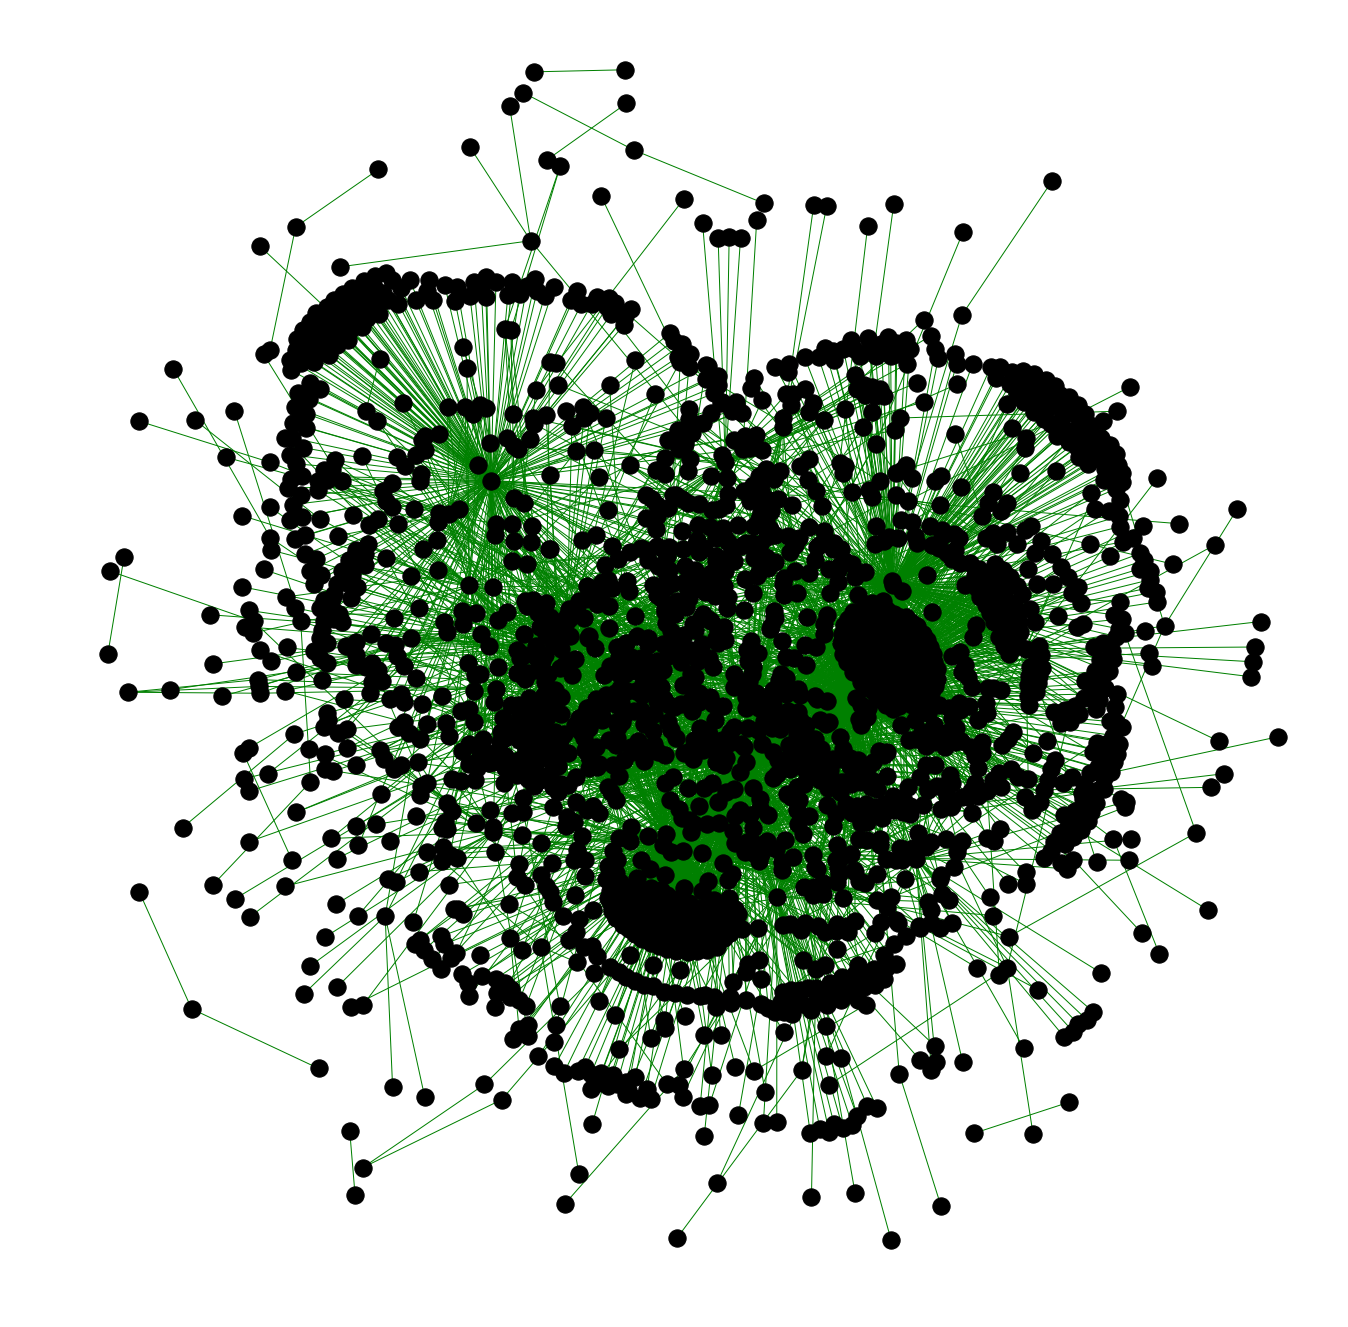

In [48]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(liste_aretes)
plt.figure(figsize=(18,18))
nx.draw(G, pos=nx.spring_layout(G,k=.12),node_color='k',edge_color='g')

In [52]:
nx.write_gexf(G, "graph.gexf")